In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_theme(style="whitegrid")
import scipy.stats as stats

In [3]:
df = pd.read_csv('../data/combined_results.csv')
df.head()

,repo_name,local_build,sat_usage,ci_build_combined,ci_state,ci_usage,cr_reviews,cr_comments,cr_changed_files,cr_changed_lines,testing_coverage
0,1c-syntax/bsl-language-server,1.0,0,1.0,1.0,1,64.0,36.0,752.0,40997.0,NaN
1,abhpd/hacktoberfest2021,NaN,0,NaN,NaN,0,14.0,14.0,52.0,7629.0,NaN
2,actiontech/dble,1.0,1,1.0,1.0,1,17.0,1.0,58.0,1513.0,8.02
3,activiti/activiti,1.0,1,1.0,1.0,1,31.0,13.0,70.0,2696.0,NaN
4,adeekshith/watomatic,NaN,0,NaN,NaN,0,16.0,11.0,88.0,2392.0,NaN


# CI usage vs. Local builds

In [5]:
df_grouped = df.groupby(by=['ci_usage', 'local_build']).count().reset_index()
df_grouped.head()

,ci_usage,local_build,repo_name,sat_usage,ci_build_combined,ci_state,cr_reviews,cr_comments,cr_changed_files,cr_changed_lines,testing_coverage
0,0,0.0,149,149,0,0,143,143,143,143,0
1,0,1.0,201,201,0,0,196,196,196,196,83
2,1,0.0,239,239,220,239,237,237,237,237,0
3,1,1.0,458,458,424,458,445,445,445,445,227


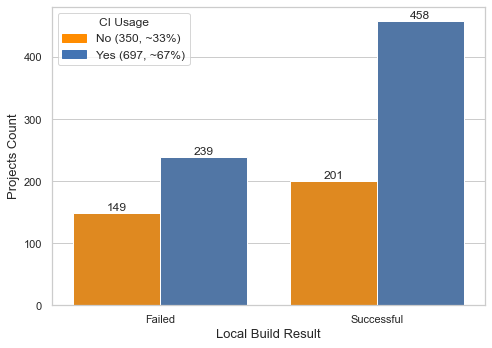

In [7]:

# Create an array with the colors you want to use
colors = ["#FF8C00", "#4374B3"]
# Set your custom color palette
sns.set(font_scale=1)

sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette(colors))
ax = sns.barplot(x="local_build", y="repo_name", hue="ci_usage", data=df_grouped)
ax.set_xlabel("Local Build Result", fontsize = 13)
ax.set_ylabel("Projects Count", fontsize = 13)

orange_patch = mpatches.Patch(color=colors[0])
blue_patch = mpatches.Patch(color=colors[1])

ax.legend(title='CI Usage', labels=['No (350, ~33%)', 'Yes (697, ~67%)'], handles=[orange_patch, blue_patch], fontsize = 12)

plt.xticks([0,1], ['Failed', 'Successful'])
for container in ax.containers:
    ax.bar_label(container)
    
plt.gcf().set_size_inches(7,5)
plt.tight_layout()
plt.savefig('../figures/ci-usage-bar-chart.pdf', dpi=300)


In [8]:
stats_df = pd.DataFrame({'No Build': [149, 239],
                   'Yes Build' : [201, 458]},index ={'No CI','Yes CI'})
stats_df

,No Build,Yes Build
Yes CI,149,201
No CI,239,458


In [13]:
def cal_chi_sq_cramer_v(stats_df):
    chiRes = stats.chi2_contingency(stats_df)
    # Details
    print(f'chi-square statistic: {chiRes[0]}')
    print(f'p-value: {chiRes[1]}')
    print(f'degree of freedom: {chiRes[2]}')
    print('expected contingency table') 
    print(chiRes[3])
    # chi-square test statistic (alternative method to derive chi-sq stat)
    chisq_stat = stats.chi2_contingency(stats_df, correction=False)[0]
    # sample size
    n = np.sum(np.sum(stats_df))
    # minimum of rows & columns
    minshape = min(stats_df.shape)-1
    # Cramer's v
    V_ = np.sqrt( (chisq_stat/n)/minshape)
    print(f"Cramer' V: {V_}")

In [14]:
cal_chi_sq_cramer_v(stats_df)

chi-square statistic: 6.500650826607792
p-value: 0.010783501227885914
degree of freedom: 1
expected contingency table
[[129.70391595 220.29608405]
 [258.29608405 438.70391595]]
Cramer' V: 0.0808922438777348


# CI buids vs. Local builds

In [15]:
df_grouped = df.groupby(by=['ci_build_combined', 'local_build']).count().reset_index()
df_grouped.head()

,ci_build_combined,local_build,repo_name,sat_usage,ci_state,ci_usage,cr_reviews,cr_comments,cr_changed_files,cr_changed_lines,testing_coverage
0,0.0,0.0,48,48,48,48,48,48,48,48,0
1,0.0,1.0,59,59,59,59,58,58,58,58,31
2,1.0,0.0,172,172,172,172,171,171,171,171,0
3,1.0,1.0,365,365,365,365,358,358,358,358,180


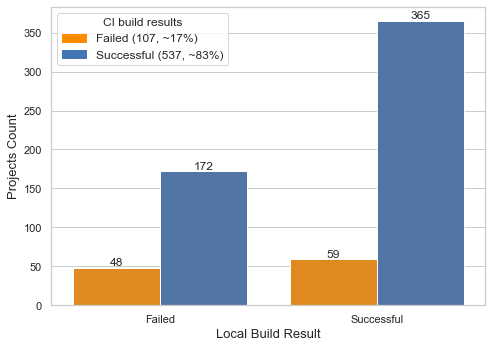

In [17]:

# Create an array with the colors you want to use
colors = ["#FF8C00", "#4374B3"]
# Set your custom color palette
sns.set(font_scale=1)

sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette(colors))
ax = sns.barplot(x="local_build", y="repo_name", hue="ci_build_combined", data=df_grouped)
ax.set_xlabel("Local Build Result", fontsize = 13)
ax.set_ylabel("Projects Count", fontsize = 13)

orange_patch = mpatches.Patch(color=colors[0])
blue_patch = mpatches.Patch(color=colors[1])

ax.legend(title='CI build results', labels=['Failed (107, ~17%)', 'Successful (537, ~83%)'], handles=[orange_patch, blue_patch], fontsize = 12)

plt.xticks([0,1], ['Failed', 'Successful'])
for container in ax.containers:
    ax.bar_label(container)
    
plt.gcf().set_size_inches(7,5)
plt.tight_layout()
plt.savefig('../figures/ci-local-builds-bar-chart.pdf', dpi=300)


In [18]:
stats_df = pd.DataFrame({'Failed Local': [48, 172],
                   'Successful Local' : [59, 365]},index ={'Failed CI','Successful CI'})
stats_df

,Failed Local,Successful Local
Failed CI,48,59
Successful CI,172,365


In [19]:
cal_chi_sq_cramer_v(stats_df)

chi-square statistic: 5.971968393183753
p-value: 0.014535047168153868
degree of freedom: 1
expected contingency table
[[ 36.55279503  70.44720497]
 [183.44720497 353.55279503]]
Cramer' V: 0.10069595524115173


## Add Code Review Metric

In [20]:
df['cr_rate'] = (df['cr_reviews'] + df['cr_comments']) / (df['cr_changed_lines'] / df['cr_changed_files'])

## Code Review / CI Usage / ASAT usage

First we'll remove cr_rate outliers:

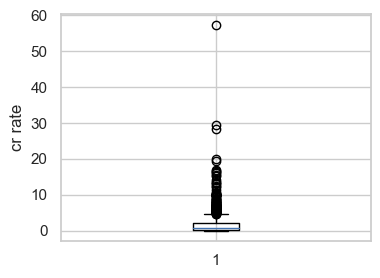

In [21]:
plt.rcParams.update({'figure.figsize':(4,3), 'figure.dpi':100})
fig1, ax1 = plt.subplots()
ax1.set_ylabel('cr rate')
ax1.boxplot(df[~df['cr_rate'].isna()]['cr_rate'])
# ax1.set_yscale('log')
plt.show()

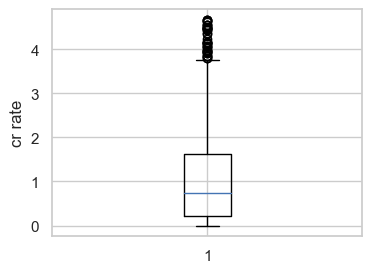

In [22]:
Q1 = df['cr_rate'].quantile(0.25)
Q3 = df['cr_rate'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['cr_rate'] >= Q1 - 1.5 * IQR) & (df['cr_rate'] <= Q3 + 1.5 *IQR)

plt.rcParams.update({'figure.figsize':(4,3), 'figure.dpi':100})
fig1, ax1 = plt.subplots()
ax1.set_ylabel('cr rate')
ax1.boxplot(df.loc[filter]['cr_rate'])
plt.show()

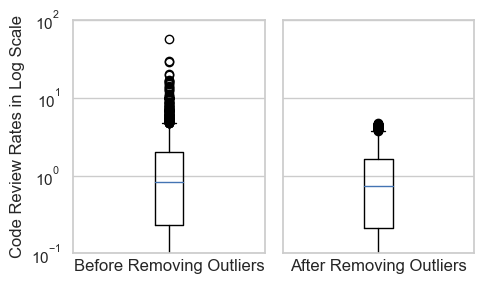

In [23]:
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
fig1, ax1 = plt.subplots(1,2,sharey=True)
ax1[0].set_xlabel('Before Removing Outliers')
ax1[0].set_ylabel('Code Review Rates in Log Scale')
ax1[0].boxplot(df[~df['cr_rate'].isna()]['cr_rate'])
ax1[0].set_yscale('log')
ax1[0].set_xticks([0], [''])

# ax1[1].set_ylabel('Count of statuses per project')
ax1[1].set_xlabel('After Removing Outliers')
ax1[1].boxplot(df.loc[filter]['cr_rate'])
ax1[1].set_xticks([0], [''])

plt.ylim(0.1, 100)
plt.gcf().set_size_inches(5,3)
plt.tight_layout()
plt.savefig('../figures/code-review-metric-before-after.pdf', dpi=300)

In [106]:
df[~df['cr_rate'].isna()]['cr_rate'].shape[0]

1398

In [108]:
df.loc[filter]['cr_rate'].shape[0]

1292

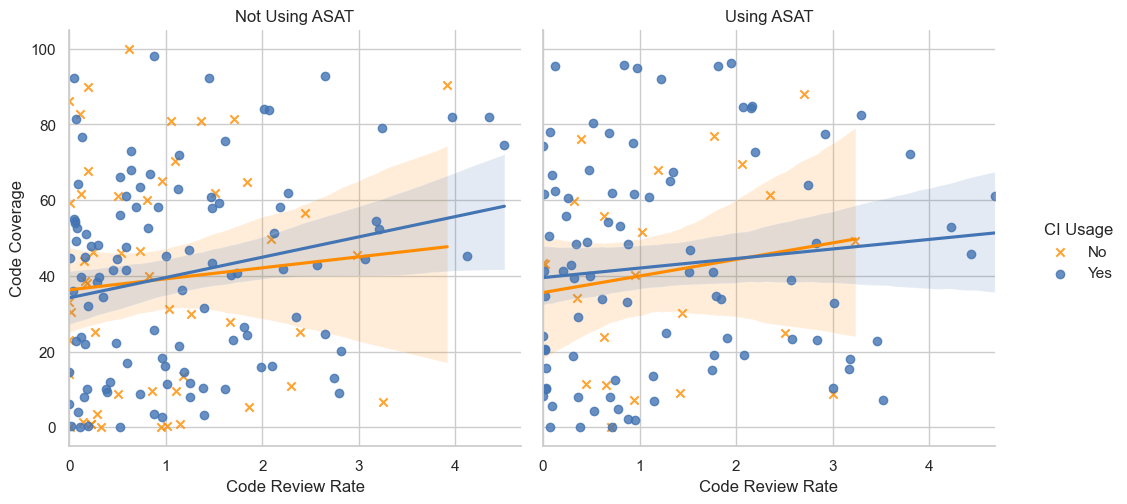

In [70]:
g = sns.lmplot(
    data=df.loc[filter],
    x="cr_rate", y="testing_coverage", col="sat_usage" ,hue="ci_usage_new", height=5, legend=True,
    markers=["x", "o"]
)
# plt.legend(title='CI Usage', loc='lower right', labels=['Yes', 'No'])

new_title = 'CI Usage'
g._legend.set_title(new_title)
new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g.axes[0][0].set_title("Not Using ASAT")
g.axes[0][1].set_title("Using ASAT")
# Use more informative axis labels than are provided by default
g.set_axis_labels("Code Review Rate", "Code Coverage")

plt.savefig('cc-cr-asat-ci.pdf', dpi=300)

Count of crosses / dots per each graph

In [76]:
no_asat_filter = (df['sat_usage'] == 0)
no_ci_filter = (df['ci_usage_new'] == 0)
asat_filter = (df['sat_usage'] == 1)
ci_filter = (df['ci_usage_new'] == 1)
with_testing_filter = (~df['testing_coverage'].isnull())

In [80]:
all_dots_count = df.loc[filter & with_testing_filter & ci_filter].shape[0]
all_crosses_count = df.loc[filter & with_testing_filter & no_ci_filter].shape[0]
left_side_count = df.loc[filter & with_testing_filter & no_asat_filter].shape[0]
right_side_count = df.loc[filter & with_testing_filter & asat_filter].shape[0]

left_dots_count = df.loc[filter & with_testing_filter & no_asat_filter & ci_filter].shape[0]
right_dots_count = df.loc[filter & with_testing_filter & asat_filter & ci_filter].shape[0]
left_crosses_count = df.loc[filter & with_testing_filter & no_asat_filter & no_ci_filter].shape[0]
right_crosses_count = df.loc[filter & with_testing_filter & asat_filter & no_ci_filter].shape[0]

print('all_dots_count', all_dots_count)
print('all_crosses_count', all_crosses_count)
print('left_side_count', left_side_count)
print('right_side_count', right_side_count)
print()
print('left_dots_count', left_dots_count)
print('right_dots_count', right_dots_count)
print('left_crosses_count', left_crosses_count)
print('right_crosses_count', right_crosses_count)

all_dots_count 195
all_crosses_count 75
left_side_count 158
right_side_count 112

left_dots_count 106
right_dots_count 89
left_crosses_count 52
right_crosses_count 23


In [83]:
print((right_dots_count + left_crosses_count) / 270)
print((right_crosses_count + left_dots_count) / 270)

0.5222222222222223
0.4777777777777778


In [85]:
print(right_dots_count / (right_dots_count + right_crosses_count))
print(left_dots_count / (left_dots_count + left_crosses_count))

0.7946428571428571
0.6708860759493671


# CI vs. ASAT

In [42]:
print(df[(df['ci_usage_new'] == 1) & (df['sat_usage'] == 1)].shape[0])
print(df[(df['ci_usage_new'] == 1) & (df['sat_usage'] == 0)].shape[0])
print(df[(df['ci_usage_new'] == 0) & (df['sat_usage'] == 1)].shape[0])
print(df[(df['ci_usage_new'] == 0) & (df['sat_usage'] == 0)].shape[0])

379
533
169
373


In [43]:
OD = pd.DataFrame({'No ASAT': [373, 533],
                   'Yes ASAT' : [169, 379]},index ={'CI Yes','CI No'})
OD

,No ASAT,Yes ASAT
CI Yes,373,169
CI No,533,379


In [44]:
chiRes = stats.chi2_contingency(OD)
# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print("{:.10f}". format(chiRes[1]))
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])

chi-square statistic: 15.147019782761388
p-value: 9.945517397323125e-05
0.0000994552
degree of freedom: 1
expected contingency table
[[337.72489684 204.27510316]
 [568.27510316 343.72489684]]


In [45]:
# chi-square test
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
# chi-square test statistic (alternative method to derive chi-sq stat)
chisq_stat = stats.chi2_contingency(OD, correction=False)[0]
# sample size
n = np.sum(np.sum(OD))
# minimum of rows & columns
minshape = min(OD.shape)-1
# Cramer's v
V_ = np.sqrt( (chisq_stat/n)/minshape)
print(f"Cramer' V: {V_}")

chi-square statistic: 15.147019782761388
p-value: 9.945517397323125e-05
Cramer' V: 0.10353358647952651


# CI vs. Testing

In [46]:
test_df = df[(~df['ci_usage_new'].isna()) & (~df['testing_coverage'].isna())]

In [47]:
test_df[['ci_usage_new', 'testing_coverage']]

,ci_usage_new,testing_coverage
2,1,8.02
8,1,48.47
11,1,4.71
26,1,36.06
29,0,11.13
...,...,...
1434,1,100.00
1435,1,100.00
1440,1,2.85
1443,1,60.88


In [48]:
result = stats.pointbiserialr(test_df['ci_usage_new'], test_df['testing_coverage'])
print(f'correlation between X and y: {result[0]:.4f}')
print(f'p-value: {result[1]:.2g}')

correlation between X and y: 0.0231
p-value: 0.69


# CI vs. Code Review

In [49]:
test_df = df[(~df['ci_usage_new'].isna()) & (~df['cr_rate'].isna())]

In [50]:
result = stats.pointbiserialr(test_df['ci_usage_new'], test_df['cr_rate'])
print(f'correlation between X and y: {result[0]:.4f}')
print(f'p-value: {result[1]:.2g}')

correlation between X and y: 0.0317
p-value: 0.24


In [51]:
result = stats.pointbiserialr(test_df['cr_rate'], test_df['ci_usage_new'])
print(f'correlation between X and y: {result[0]:.4f}')
print(f'p-value: {result[1]:.2g}')

correlation between X and y: 0.0317
p-value: 0.24


After removing outliers of code review:

In [52]:
test_df = df.loc[filter &(~df['ci_usage_new'].isna()) & (~df['cr_rate'].isna())]
result = stats.pointbiserialr(test_df['ci_usage_new'], test_df['cr_rate'])
print(f'correlation between X and y: {result[0]:.4f}')
print(f'p-value: {result[1]:.2g}')

correlation between X and y: 0.1020
p-value: 0.00024


# ASAT vs. Code Review

In [53]:
test_df = df[(~df['sat_usage'].isna()) & (~df['cr_rate'].isna())]

result = stats.pointbiserialr(test_df['sat_usage'], test_df['cr_rate'])
print(f'correlation between X and y: {result[0]:.4f}')
print(f'p-value: {result[1]:.2g}')

correlation between X and y: 0.0190
p-value: 0.48


After removing outliers:

In [54]:
test_df = df.loc[filter &(~df['sat_usage'].isna()) & (~df['cr_rate'].isna())]

result = stats.pointbiserialr(test_df['sat_usage'], test_df['cr_rate'])
print(f'correlation between X and y: {result[0]:.4f}')
print(f'p-value: {result[1]:.2g}')

correlation between X and y: 0.1190
p-value: 1.8e-05


# Testing vs. Code Review

In [55]:
test_df = df[(~df['cr_rate'].isna()) & (~df['testing_coverage'].isna())]

result = stats.pointbiserialr(test_df['testing_coverage'], test_df['cr_rate'])
print(f'correlation between X and y: {result[0]:.4f}')
print(f'p-value: {result[1]:.2g}')

correlation between X and y: 0.2912
p-value: 2.7e-07


In [56]:
test_df = df.loc[filter &(~df['testing_coverage'].isna()) & (~df['cr_rate'].isna())]

result = stats.pointbiserialr(test_df['testing_coverage'], test_df['cr_rate'])
print(f'correlation between X and y: {result[0]:.4f}')
print(f'p-value: {result[1]:.2g}')

correlation between X and y: 0.1542
p-value: 0.011


# More Code Review Analysis

In [57]:
high_cr_filter = ((df['comments'] == 'Very High') | (df['reviews'] == 'Very High'))
df[high_cr_filter].shape[0]

239

In [58]:
df[high_cr_filter].sat_usage.value_counts()

0    121
1    118
Name: sat_usage, dtype: int64

In [59]:
df[high_cr_filter].ci_usage_new.value_counts()

1    156
0     83
Name: ci_usage_new, dtype: int64

In [60]:
print(df[high_cr_filter].testing_coverage.median())
print(df[high_cr_filter].testing_coverage.mean())

48.955
45.837


In [61]:
df[high_cr_filter].testing_coverage.count()

40

In [62]:
low_cr_filter = ((df['comments'] == 'Low') & (df['reviews'] == 'Low'))
df[low_cr_filter].shape[0]

781

In [63]:
df[low_cr_filter].sat_usage.value_counts()

0    534
1    247
Name: sat_usage, dtype: int64

In [64]:
df[low_cr_filter].ci_usage_new.value_counts()

1    477
0    304
Name: ci_usage_new, dtype: int64

In [65]:
print(df[low_cr_filter].testing_coverage.median())
print(df[low_cr_filter].testing_coverage.mean())

44.8
44.59529069767442


In [66]:
df[low_cr_filter].testing_coverage.count()

172